In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 데이터 준비

In [2]:
iris_data = load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = pd.DataFrame(iris_data.target, columns=['class'])

y.head()

,class
0,0
1,0
2,0
3,0
4,0


## 결정 트리 쉽게 사용하기

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [9]:
model = DecisionTreeClassifier(max_depth=4) # 결정 트리 모델 생성

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
y_test_prediction = model.predict(X_test)
y_test_prediction

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [14]:
# 평가하기
model.score(X_test, y_test)

0.9

## 속성 중요도 확인하기

In [16]:
importances = model.feature_importances_ # 속성들의 중요도

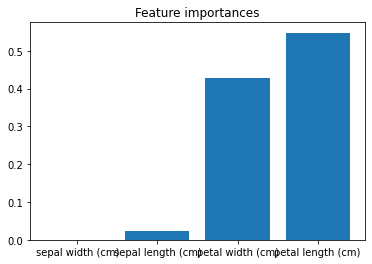

In [19]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted])
plt.show()